In [1]:
import cv2
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Class to get all data that is known


In [2]:

class DataSet ():
    def __init__(self, sequence):
        left_image_files = os.listdir('../dataset/00/image_2')
        right_image_files = os.listdir('../dataset/00/image_3')
        self.seq_dir = '../dataset/{}/'.format(sequence)
        self.pos,self.initC2k,self.intitC2r,self.intitC2t = self.Intrinsic_Matrix('P2')
        self.pos,self.initC3k,self.intitC3r,self.intitC3t = self.Intrinsic_Matrix('P3')
        self.first_image_left = cv2.imread(self.seq_dir + 'image_2/' 
                                               + left_image_files[0], 0)
        self.first_image_right = cv2.imread(self.seq_dir + 'image_3/' 
                                               + right_image_files[0], 0)
        self.second_image_left = cv2.imread(self.seq_dir + 'image_2/' 
                                               + left_image_files[1], 0)
    def Intrinsic_Matrix(self, cam):
        calib = pd.read_csv(self.seq_dir + 'calib.txt', delimiter=' ', header=None, index_col=0)
        calib = np.array(calib.loc[f'{cam}:']).reshape((3,4))
        k1, r1, t1, _, _, _, _ = cv2.decomposeProjectionMatrix(calib)
        t1 = t1 / t1[3]
        return calib, k1, r1, t1


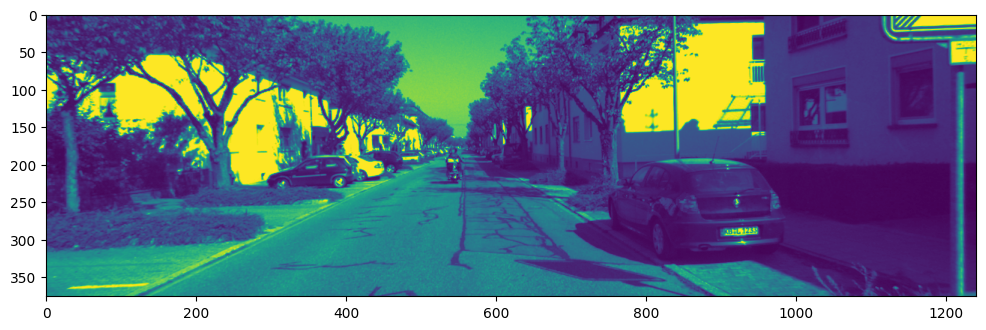

In [4]:
%matplotlib inline
D1 = DataSet('00')
plt.figure(figsize=(12,6))
plt.imshow(D1.first_image_left)

In [ ]:
cv2.